$\newcommand{\si}{\sigma}
\newcommand{\al}{\alpha}
\newcommand{\tta}{\theta}
\newcommand{\Tta}{\Theta}
\newcommand{\Si}{\Sigma}
\newcommand{\ld}{\ldots}
\newcommand{\cd}{\cdots}
\newcommand{\Ga}{\Gamma} 
\newcommand{\bet}{\beta}
\newcommand{\cU}{\mathcal{U}}
\newcommand{\cN}{\mathcal{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\p}{\mathbb{P}}
\newcommand{\f}{\frac}
\newcommand{\ff}{\frac{1}}
\newcommand{\ds}{\displaystyle}
\newcommand{\bE}{\mathbf{E}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\bF}{\mathbf{F}}
\newcommand{\ii}{\mathrm{i}}
\newcommand{\me}{\mathrm{e}}
\newcommand{\hsi}{\hat{\sigma}}
\newcommand{\hmu}{\hat{\mu}}
\newcommand{\ste}{\, ;\, }
\newcommand{\op}{\operatorname} 
\newcommand{\argmax}{\op{argmax}}
\newcommand{\lfl}{\lfloor}
\newcommand{\ri}{\right}
\newcommand{\supp}{\operatorname{supp}}$

# TP Simulation du Mod√®le d'Ising par Metropolis Hastings 

## 1. Mod√®le d'Ising

### 1.1 Description du mod√®le

Le *mod√®le d'Ising*, d√ª √† Ernst Ising, est l'un des champs de Gibbs les plus simples et les plus √©tudi√©s. Il d√©crit les transitions de phase de l'aimantation d'un m√©tal ferromagn√©tique. Dans ce qui suit on le d√©crit en deux dimensions, mais on peut le d√©finir en dimension plus grande.

Consid√©rons un r√©seau de taille $N \times N$, que l'on note $\Ga=\{1,\ld,N\}^2$. A chaque position $(i,j)$ du r√©seau, on associe une quantit√© $s_{i,j}$, appel√©e *spin*, prenant les valeurs $\pm 1$. 
On note $S=(s_{i,j})_{(i,j)\in \Ga}$ une configuration possible de spins. L'ensemble des configurations (ou √©tats) du r√©seau est donc $E = \{-1,1\}^\Ga$, et est potentiellement de tr√®s grande dimension ! 

Ci-dessous on repr√©sente une configuration possible pour un petit r√©seau $6\times 6$, avec deux couleurs possibles sur les positions, correspondant aux valeurs $-1$ et $1$. 


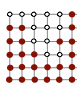

Les spins interagissent avec leurs plus proches voisins. On peut d√©finir l'√©nergie d'une configuration $S$ comme 
$$E(S) = \sum_{(k,l)\sim (i,j)}(s_{k,l}-s_{i,j})^2,$$
o√π $(i,j)\sim (k,l)$ signifie que les positions $(i,j)$ et $(k,l)$ sont voisins (√† distance 1) sur le r√©seau $\Ga$. 
On voit que si l'on cherche √† minimiser $E$, on tombe sur deux configurations constantes (celle o√π les spins sont tous √©gaux √† $1$ et celle o√π ils sont tous √©gaux √† $-1$). 
Comme les valeurs $s_{i,j}$ valent $\pm 1$, en d√©veloppant l'√©nergie ci-dessous, on s'aper√ßoit qu'il est √©quivalent de minimiser l'√©nergie  
$$H(S) = -\sum_{(k,l)\sim (i,j)}s_{k,l}s_{i,j},$$
On associe √† cette √©nergie la mesure de Gibbs suivante
$$\mu_\bet(S)=\ff{Z_\bet}\me^{-\bet H(S)},$$
o√π la fonction de partition $Z_\bet$ sert √† normaliser la mesure de Gibbs, et o√π $\bet:=\ff T$, $T>0$ pouvant s'interpr√®ter comme une temp√©rature : quand $T$ est grand, les fluctuations thermiques dominent et le syst√®me est d√©sordonn√©, par contre pour $T$ proche de $0$ les configurations de basse √©nergie sont privil√©gi√©es et les spins ont tendance √† s'aligner.

### 1.2 Simulation du mod√®le d'Ising

**Dans ce qui suit, nous allons impl√©menter l'algorithme de Metropolis-Hastings afin de simuler sous la loi $\mu_\bet$ du mod√®le d'Ising.**

Retraduit dans le formalisme des cha√Ænes de Markov, une configuration $S$ correspond √† un √©tat et l'espace d'√©tats est $E = \{-1,1\}^\Ga$. Pour un domaine de taille $N = 40$, le cardinal de $E$ est $2^{40√ó40}\approx   10^{481}$. Il est donc impossible d'√©num√©rer toutes les configurations pour calculer la distribution $\mu_\bet$. 

Pour tout $(i,j)\in \Ga$, on note $S^{\rightarrow(i,j)}$ la configuration d√©duite de $S$ en changeant simplement le signe du spin en $(i,j)$. Deux configurations sont dites voisines si elles peuvent √™tre d√©duites l'une de l'autre par un changement de spin en un point.

Pour la matrice de transition $Q$ qui va nous servir √† simuler la cha√Æne de Markov, on la prend nulle partout sauf pour les couples de configurations voisines, et telle que   
$$\forall (i,j)\in \Ga, \qquad  Q(S,S^{\rightarrow(i,j)}) = \ff{\op{Card}(\Ga)}.$$

Cette matrice de transition correspond au m√©canisme suivant : un site $(i,j)$ est choisi au hasard dans $\Ga$ et son spin  dans $S$ est retourn√© (passe de $1$ √† $-1$ ou le contraire). Ce sont les seules transitions autoris√©es. Ces transitions modifient les configurations seulement localement, par cons√©quent la variation de l'√©nergie correspondant au changement du spin en $(i,j)$ ne d√©pend que de la moyenne des spins autour de $(i,j)$:

$$\Delta H(S,S^{\rightarrow(i,j)}):=H(S^{\rightarrow(i,j)})-H(S)=-\sum_{(k,l)\sim (i,j)}s_{k,l}(-s_{i,j})-\left(-\sum_{(k,l)\sim (i,j)}s_{k,l}s_{i,j}\right)=2s_{i,j}\sum_{(k,l)\sim (i,j)}s_{k,l}.$$

La fonction $\rho$   est alors donn√©e par 
$$\rho(S,S^{\rightarrow(i,j)})=\me^{-\bet\Delta H(S,S^{\rightarrow(i,j)}) } .$$


### 1.3 Algorithme de Metropolis-Hastings

On en d√©duit l'algorithme suivant :

*Algorithme de Metropolis-Hastings de simulation de $S\approx \mu_\bet$*
1. *Initialiser  avec une configuration $S$ quelconque.*
2. *R√©p√©ter un grand nombre de fois :*
    + *tirer, ind√©pendamment, $(i,j)$ de loi unif. sur $\Ga$ et $U\sim\cU([0,1])$,*
    + *remplacer $S$ par $S^{\rightarrow(i,j)}$ si $U <\me^{-\bet\Delta H(S,S^{\rightarrow(i,j)}) }$  et le laisser invariant sinon.*
3. *Rendre $S$.*


### 1.4 Exercice

On va impl√©menter l'algorithme pr√©c√©dent et le faire tourner pour diverses configurations initiales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
# param√®tres
beta=10               #beta = 1/T
N,Npas=int(1e2),int(2e5)   # NxN est le nombre de positions sur la grille et Npas est le nb de pas d'√©volution de la cha√Æne  

1. **Ecrire une fonction `transition(S,N,beta)` qui prend en entr√©e une image $S$ compos√©e de $1$ et des $-1$, de taille $N\times N$, choisit une position al√©atoire $(i,j)$ dans la grille de l'image, et d√©cide si on modifie ou non la valeur en ce point (en multipliant sa valeur par par $-1$) en fonction de l'√©volution de l'√©nergie $H$, comme expliqu√© au dessus. Utiliser cette fonction pour faire √©voluer la cha√Æne de Markov sur `Npas` it√©rations.** 

In [4]:
def deltaH(i,j,S,N):
    return -2*S[i,j]*(S[i-1,j] + S[i,j-1] + S[(i+1)%N,j] + S[i,(j+1)%N])

In [5]:
def transition(S, N, beta):
    U = np.random.uniform()
    i,j = np.random.randint(N, size = 2)
    rho = np.exp(beta*deltaH(i,j,S,N))
    if U < rho:
        S[i,j] *= -1
    return S

In [6]:
# Initialisation (essayer plusieurs √©tats initiaux possible, tr√®s al√©atoire ou au contraire tr√®s d√©terministes)
S0=2*np.random.randint(2,size=(N,N))-1   # initialisation al√©atoire
    
# On fait evoluer la cha√Æne de Markov    
S = np.copy(S0)
for t in range(Npas):
    S=transition(S,N,beta)

2. **Tester avec diff√©rentes initialisations possibles (tr√®s al√©atoires ou au contraire tr√®s d√©terministes), et avec plusieurs valeurs de $\beta$ (ou de la temp√©rature $T$). Comment varient les r√©sultats en fonction de la temp√©rature ?**

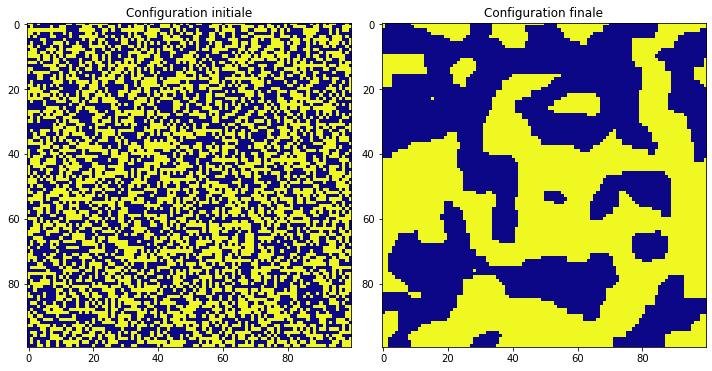

In [7]:
# Affichage √©tat initial et final
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].imshow(S0, interpolation='none',cmap='plasma')
axes[0].set_title('Configuration initiale')
axes[1].imshow(S, interpolation='none',cmap='plasma')
axes[1].set_title('Configuration finale')
fig.tight_layout()

### Plus la temp√©rature est √©lev√©e plus la configuration finale, S est d√©terministe et les spins s'alignent au contraire √† basse temp√©rature, on a un r√©sultat tr√®s d√©sordonn√©.

## 2. Utilisation du mod√®le d'Ising conditionn√© par une image

On peut modifier l√©g√®rement le mod√®le pr√©c√©dent en le for√ßant √† ne pas trop s'√©loigner d'une image $I$ sur le m√™me r√©seau (dans l'interpr√©tation physique, $I$ r√©pr√©sente un champ magn√©tique). L'id√©e est de simuler non plus directement sous la loi $\mu_\bet$ mais sous une loi a posteriori qu'on va noter $\nu_\bet$ et qui d√©pend de $I$. Notons $I$ cette image, de taille $N\times N$, **qu'on suppose √† valeurs dans $[-1,1]$** (si l'image est sur $[0,256]$ ou sur $[0,1]$, il faudra donc la normaliser pour que son minimum soit √† $-1$ et son maximum √† $1$). On note $I_{i,j}$ la valeur de l'image √† la position $(i,j)$. 

L'√©nergie associ√©e √† la configuration $S$ est alors
$$E(S|I) =  \sum_{(i,j)\sim (k,l)} (s_{i,j}-s_{k,l})^2+c\sum_{(i,j)\sim (k,l)} (I_{i,j} - s_{i,j})^2,$$
avec $c$ une constante permettant de modifier le poids relatif des deux termes.
En d√©veloppant, on se rend compte que cette √©nergie est √©gale (√† une constante additive pr√®s ne d√©pendant pas de $S$) √† $2H(S|I)$ avec
 $$H(S|I) = -\sum_{(i,j)\sim (k,l)}s_{i,j}s_{k,l} - 2c \sum_{i,j} s_{i,j} I_{i,j}.$$
Le premier terme de l'√©nergie favorise les √©tats avec des zones constantes, alors que le deuxi√®me favorise les √©tats bien corr√©l√©s avec l'image $I$.

On note $\nu_\bet$ la mesure
$$\nu_\bet(S) = \ff{Z_\bet}\me^{-\bet H(S|I)}.$$

Lorsqu'on modifie la valeur de $S$ en la position $(i,j)$, la variation de l'√©nergie $H(S|I)$ entre les deux √©tats s'√©crit 
$$\Delta H_{S|I}(S,S^{\rightarrow(i,j)}):=H(S^{\rightarrow(i,j)}|I)-H(S|I)=2s_{i,j}\sum_{(k,l)\sim (i,j)}s_{k,l} + 2 c s_{i,j} I_{i,j}.$$

La fonction $\rho$   est alors donn√©e par 
$$\rho(S,S^{\rightarrow(i,j)})=\me^{-\bet\Delta H_{S|I}(S,S^{\rightarrow(i,j)}) } .$$

### Exercice

1. Commencez par r√©cup√©rer une image en ligne, par exemple celle du cameraman disponible ici 
https://web.stanford.edu/class/ee398b/data/image/cman.tif
et importez cette image √† l'aide de plt.imread dans une matrice. Normalisez-la pour qu'elle soit entre -1 et 1.

2. Impl√©mentez l'algorithme de Metropolis-Hastings pour cette mesure, pour plusieurs valeurs de $c$ et de $\beta$ et commentez les r√©sultats. Quelle est l'influence du param√®tre $c$ sur les r√©sultats ? D√©terminer des t√©mp√©ratures pour lesquelles les √©chantillons semblent d√©pendre tr√®s peu de l'image $I$, et des temp√©ratures o√π au contraire le r√©sultat semble tr√®s fortement corr√©l√© √† $I$. 

3. Faire tourner l'algorithme pour $T=0$ (on accepte une transition si et seulement si elle fait diminuer l'√©nergie). Que doit-on obtenir en pratique ? Combien d'it√©rations faut-il pour que l'algorithme se stabilise ? Le r√©sultat obtenu d√©pend-il de l'initialisation ?

-1.0 1.0


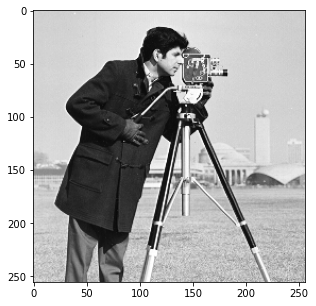

In [8]:
plt.figure(figsize=(5, 5))
plt.imshow(I,cmap='gray')
I = 2*(I-I.min())/(I.max() - I.min()) - 1
print(I.min(), I.max())

In [9]:
def deltaH_im(i,j,S,c,N,I):
    return deltaH(i,j,S,N) - 4*c*S[i,j]*I[i,j]

In [10]:
def transition_im(S,N,c,beta,I):
    U = np.random.uniform()
    i,j = np.random.randint(N, size = 2)
    rho = np.exp(beta*deltaH_im(i,j,S,c,N,I))
    if U < rho:
        S[i,j] *= -1
    return S

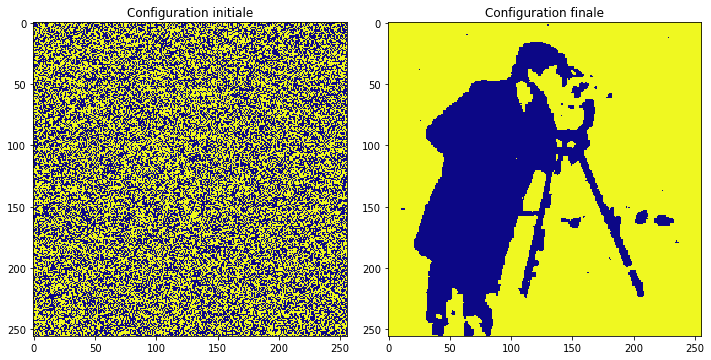

In [11]:
# param√®tres
beta=int(1)                   #beta = 1/T
N,Npas=256,int(1e6)   # NxN est le nombre de positions sur la grille et Npas est le nb de pas d'√©volution de la cha√Æne  
c=0.5

# Initialisation (essayer plusieurs √©tats initiaux possible, tr√®s al√©atoire ou au contraire tr√®s d√©terministes)
S0=2*np.random.randint(2,size=(N,N))-1   # initialisation al√©atoire
    
# On fait evoluer la cha√Æne de Markov    
S= np.copy(S0)
for t in range(Npas):
    S=transition_im(S,N,c,beta,I)

# Affichage √©tat initial et final
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(S0, interpolation='none',cmap='plasma')
axes[0].set_title('Configuration initiale')
axes[1].imshow(S, interpolation='none',cmap='plasma')
axes[1].set_title('Configuration finale')
fig.tight_layout()

/Users/bouacha_lazhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


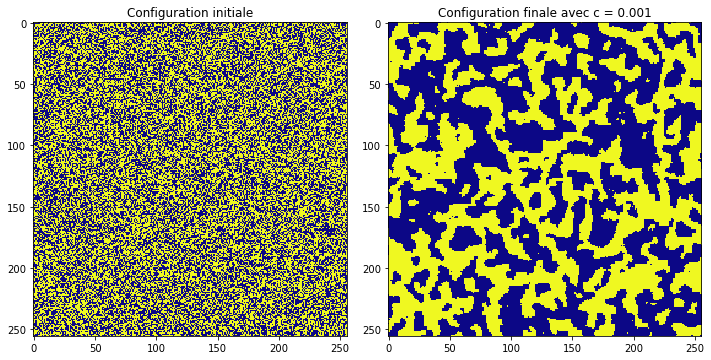

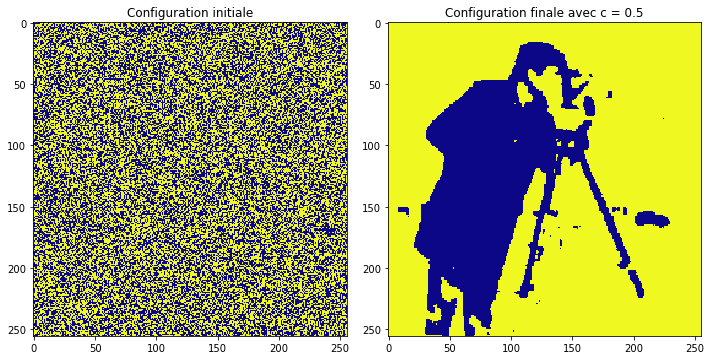

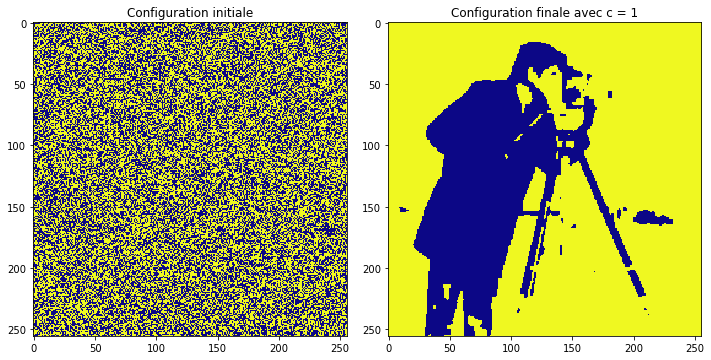

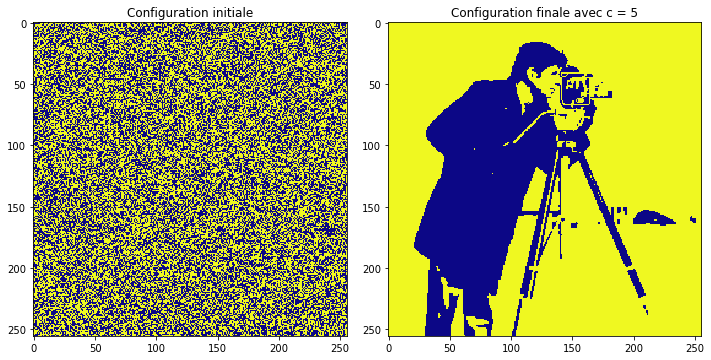

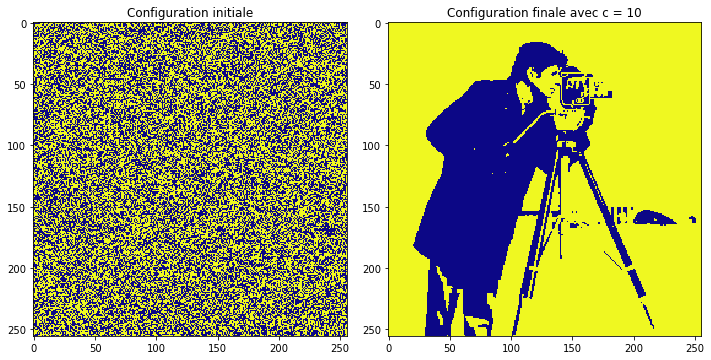

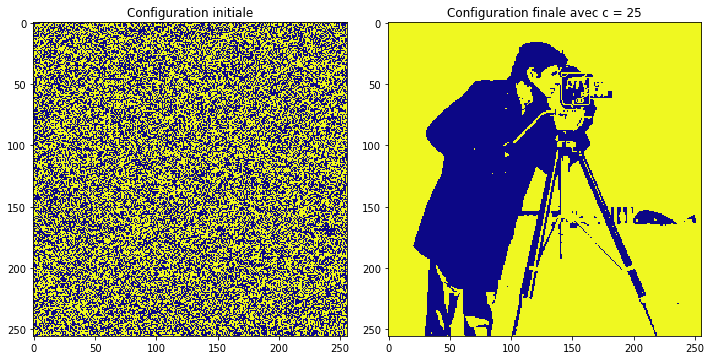

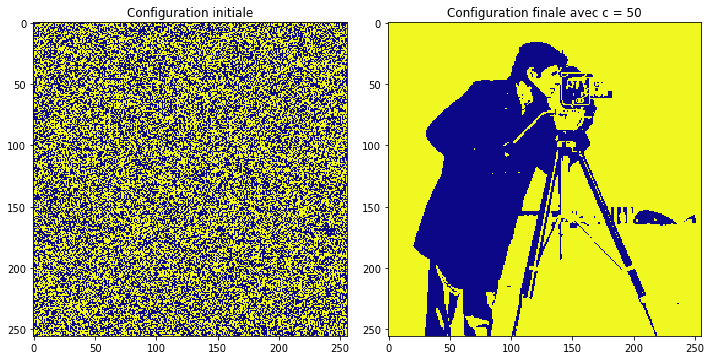

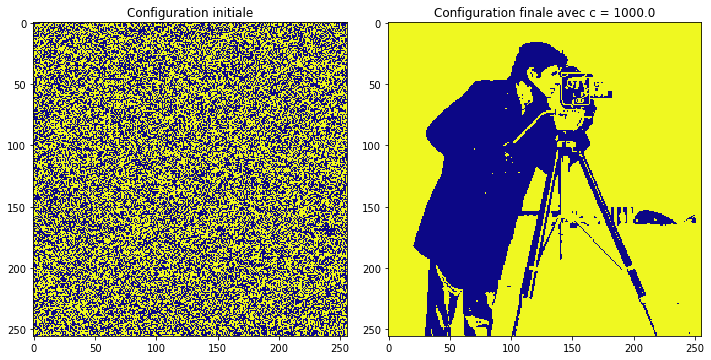

In [12]:
# param√®tres
beta=int(1)                   #beta = 1/T
N,Npas=256,int(1e6)   # NxN est le nombre de positions sur la grille et Npas est le nb de pas d'√©volution de la cha√Æne  
c=[1e-3, 0.5, 1, 5, 10, 25, 50, 1e3]

# Initialisation (essayer plusieurs √©tats initiaux possible, tr√®s al√©atoire ou au contraire tr√®s d√©terministes)
S0=2*np.random.randint(2,size=(N,N))-1   # initialisation al√©atoire
    
# On fait evoluer la cha√Æne de Markov    
for ci in c:
    S= np.copy(S0)
    for t in range(Npas):
        S=transition_im(S,N,ci,beta,I)
    
    # Affichage √©tat initial et final
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].imshow(S0, interpolation='none',cmap='plasma')
    axes[0].set_title('Configuration initiale')
    axes[1].imshow(S, interpolation='none',cmap='plasma')
    axes[1].set_title('Configuration finale avec c = ' +str(ci))
    fig.tight_layout()

#### Plus la valeur de c est √©lev√©e plus le r√©sultat reproduit fid√®lement l'image et de ce fait minimise l'al√©a. 

/Users/bouacha_lazhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


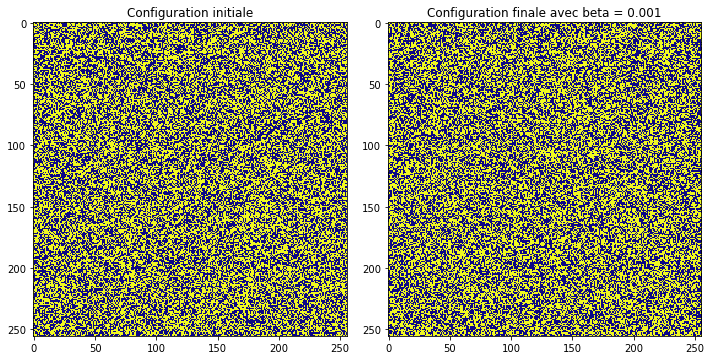

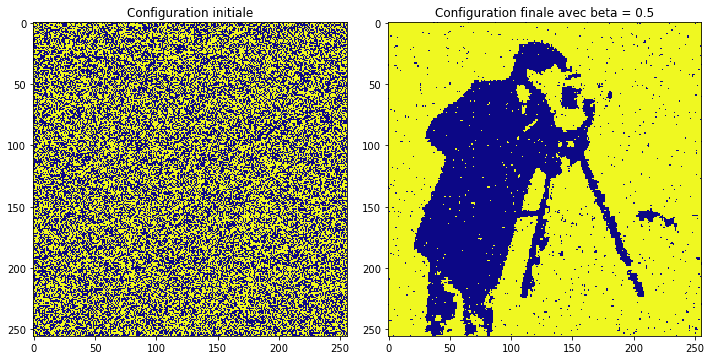

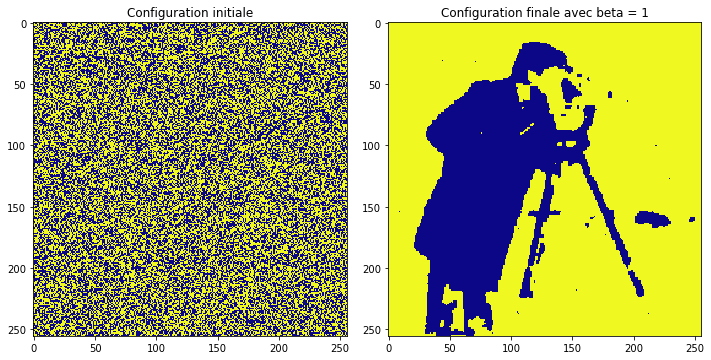

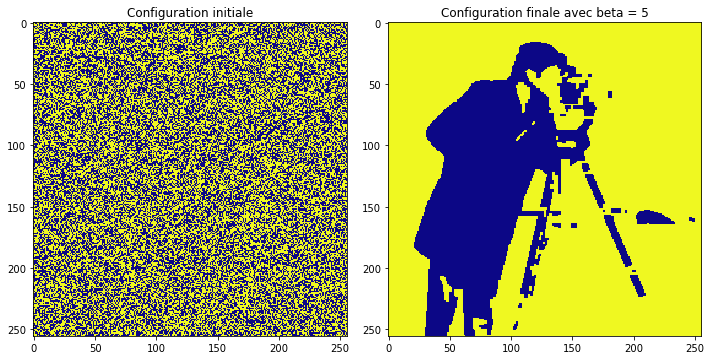

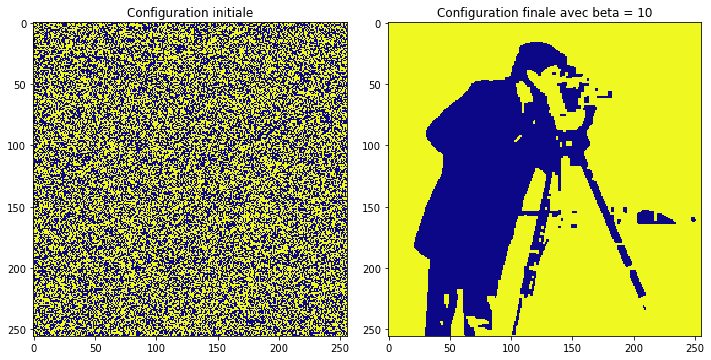

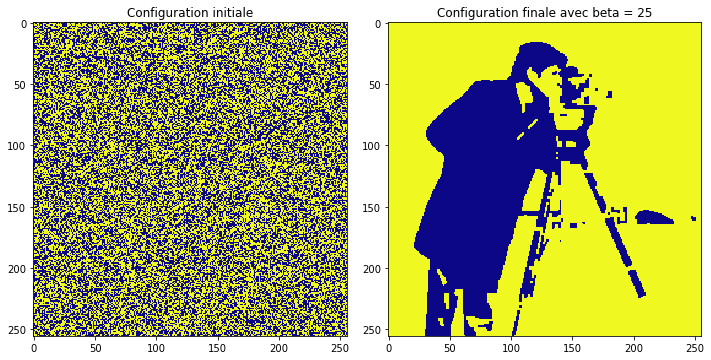

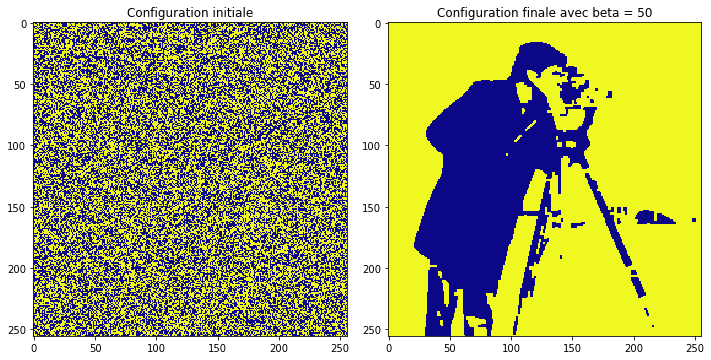

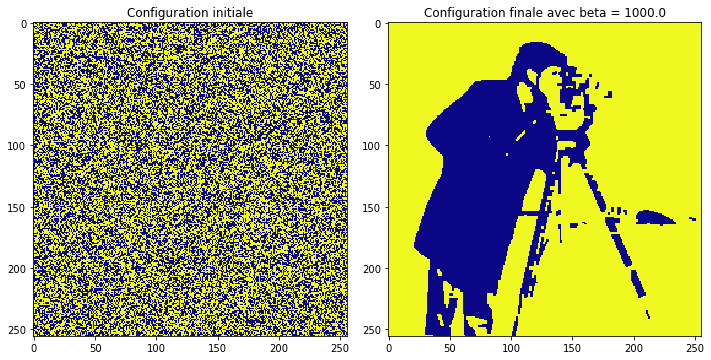

In [13]:
# param√®tres
beta=[1e-3, 0.5, 1, 5, 10, 25, 50, 1e3]                #beta = 1/T
N,Npas=256,int(1e6)   # NxN est le nombre de positions sur la grille et Npas est le nb de pas d'√©volution de la cha√Æne  
c=0.5

# Initialisation (essayer plusieurs √©tats initiaux possible, tr√®s al√©atoire ou au contraire tr√®s d√©terministes)
S0=2*np.random.randint(2,size=(N,N))-1   # initialisation al√©atoire
    
# On fait evoluer la cha√Æne de Markov    
for bi in beta:
    S= np.copy(S0)
    for t in range(Npas):
        S=transition_im(S,N,c,bi,I)
    
    # Affichage √©tat initial et final
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].imshow(S0, interpolation='none',cmap='plasma')
    axes[0].set_title('Configuration initiale')
    axes[1].imshow(S, interpolation='none',cmap='plasma')
    axes[1].set_title('Configuration finale avec beta = ' +str(bi))
    fig.tight_layout()

#### Les temp√©ratures inf√©rieures √† 1 semblent d√©pendre tr√®s peu de l'image  ùêº  tandis que les temp√©ratures sup√©rieures √† 1 sont tr√®s corr√©l√©es √†  ùêº.

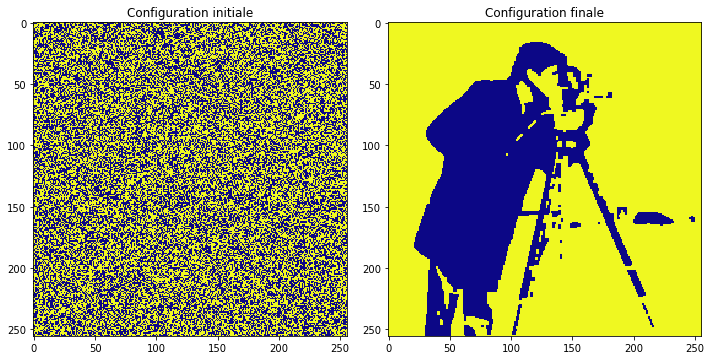

In [14]:
# param√®tres
beta=np.inf                #beta = 1/T
N,Npas=256,int(1e6)   # NxN est le nombre de positions sur la grille et Npas est le nb de pas d'√©volution de la cha√Æne  
c=0.5


# Initialisation (essayer plusieurs √©tats initiaux possible, tr√®s al√©atoire ou au contraire tr√®s d√©terministes)
S0=2*np.random.randint(2,size=(N,N))-1   # initialisation al√©atoire
    
# On fait evoluer la cha√Æne de Markov    
S= np.copy(S0)
for t in range(Npas):
    S=transition_im(S,N,c,beta,I)

# Affichage √©tat initial et final
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(S0, interpolation='none',cmap='plasma')
axes[0].set_title('Configuration initiale')
axes[1].imshow(S, interpolation='none',cmap='plasma')
axes[1].set_title('Configuration finale')
fig.tight_layout()

### En pratique les spins doivent s'aligner sur l'image I. Il faut 1 million d'it√©rations pour obtenir un r√©sultat stable. √âtant donn√© que S est une matrice al√©atoire le r√©sultat ne d√©pend pas de l'initialisation.

## 3. Recuit simul√©
On va maintenant calculer le maximum de vraisemblance de la loi $\nu_\bet$ en utilisant **l'algorithme de recuit simul√©**. 

On rappelle que cet algorithme diff√®re de celui de Metropolis-Hastings uniquement par le fait qu'on fait lentement baisser la temp√©rature $T$ (ou augmenter $\beta$) au fur et √† mesure des it√©rations. 
 
Pour la fonction $t\mapsto\bet_t$, on propose de choisir $\beta(t)=2*log(t+2)$.

1. Modifiez vos fonctions pr√©c√©dentes pour impl√©menter l'algorithme de recuit simul√© sur l'exemple pr√©c√©dent. Faites un graphe de l'√©nergie au cours des it√©rations. 

In [15]:
def transition_im2(S,N,c,beta,I):
    U = np.random.uniform()
    i,j = np.random.randint(N, size = 2, dtype = int)
    rho = np.exp(beta*deltaH_im(i,j,S,c,N,I))
    Energie = (S[i,j] - S[i-1,j])**2 +  (S[i,j] - S[i,j-1])**2 + (S[i,j] - S[(i+1)%N,j])**2 + (S[i,j] - S[i,(j+1)%N])**2 + 2*c*(I[i,j] - S[i,j])**2
    if U < rho:
        S[i,j] *= -1
    return S, Energie

In [16]:
def EnergieTotale(S, I, N): 
    energieS = 0.0
    energieI = 0.0 
    for i in range(N): 
        for j in range(N): 
            energieS += S[i,j]
            energieI += I[i,j]
    return -2*energieS - 4*c*energieI

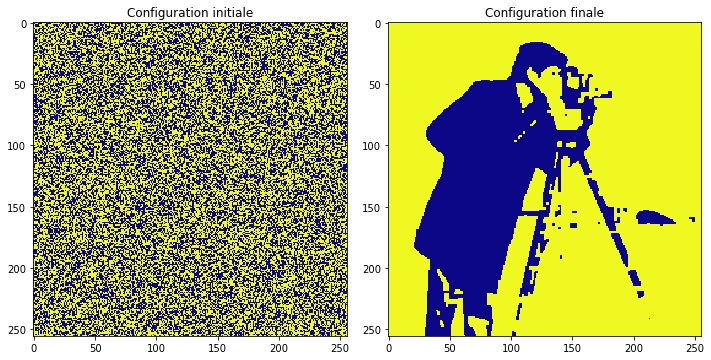

In [17]:
# param√®tres
N,Npas=256,int(1e6)   # NxN est le nombre de positions sur la grille et Npas est le nb de pas d'√©volution de la cha√Æne  

# Initialisation al√©atoire
S0=2*np.random.randint(2,size=(N,N))-1  

# On fait evoluer la cha√Æne de Markov    
S = np.copy(S0)
Er = [EnergieTotale(S, I, N)]
for t in range(Npas):
    S, Energie = transition_im2(S,N,c,2*np.log(t+2),I)
    Er.append(Er[t] + Energie)

# Affichage √©tat initial et final
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(S0, interpolation='none',cmap='plasma')
axes[0].set_title('Configuration initiale')
axes[1].imshow(S, interpolation='none',cmap='plasma')
axes[1].set_title('Configuration finale')
fig.tight_layout()

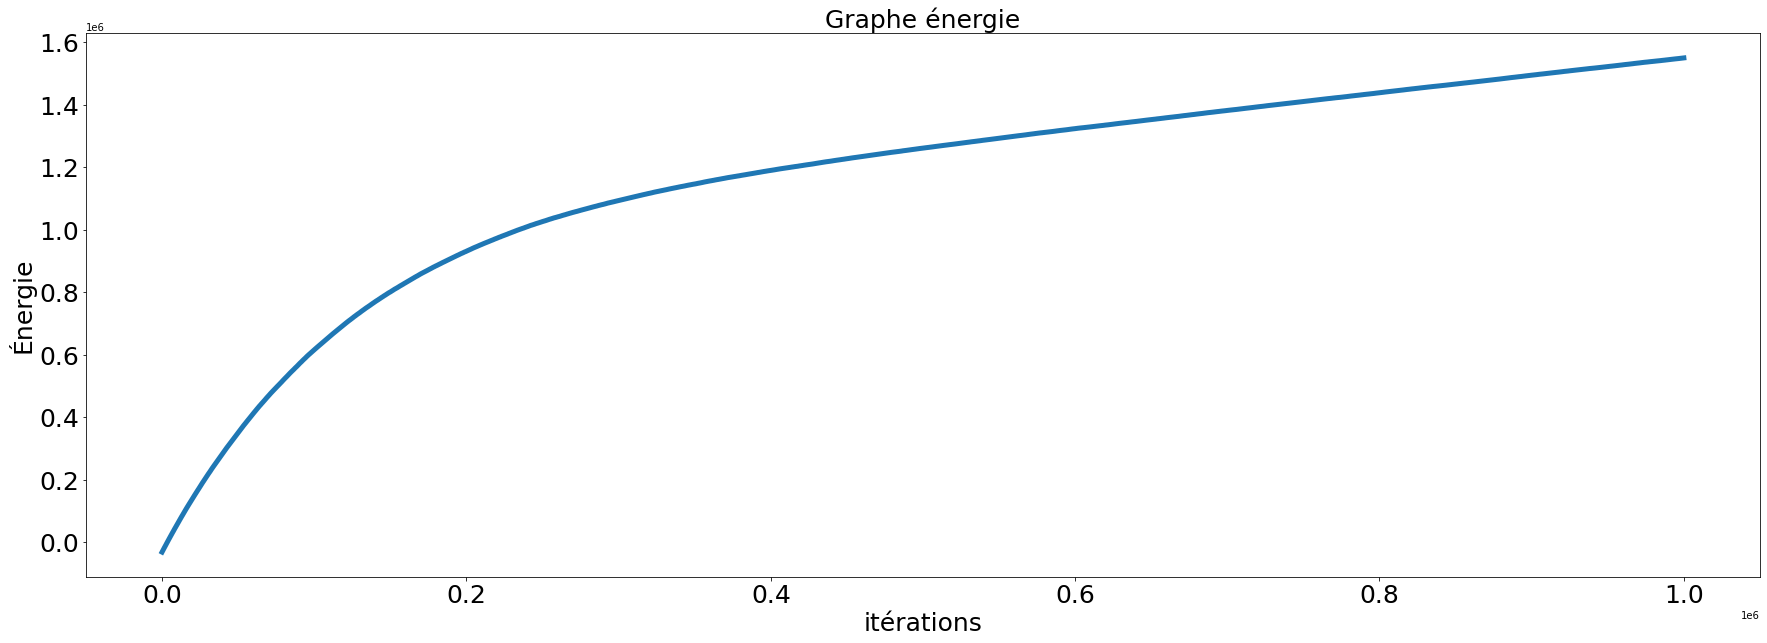

In [18]:
plt.figure(figsize=(30, 10))
plt.plot(Er, linewidth = 5)
plt.title('Graphe √©nergie', fontsize=25)
plt.xlabel('it√©rations', fontsize=25)
plt.ylabel('√ânergie', fontsize=25)
plt.tick_params(axis = 'both', labelsize = 25)